# Uniform tree search

### Initialize tree

In [35]:
from utils import TreeNode, Tree
from copy import copy, deepcopy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [65]:
# Example usage
depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5
tree = Tree(depth, branching_factor, n, discount_factor, make_viz=True, sampling="asymetric")

In [66]:
# attention: different meanings of depth for Tree and for TreeNode
print(tree.depth)
print(tree.root.depth)
print(tree.root.children[0].depth)

5
0
1


In [67]:
graph = tree.to_graphviz()
graph.render('tree', format='png', cleanup=True)

'tree.png'

In [68]:
import random

In [69]:
random.shuffle([0,1])

In [70]:
reward = deepcopy(tree).uniform_search()

In [71]:
reward

0.3750102079802931

In [72]:
reward = deepcopy(tree).uniform_search()

In [73]:
tree.compute_regret(reward)

0.0015891132116853113

Regret histograms - uniformly sampled rewards

In [74]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor)
    reward = deepcopy(tree).uniform_search()
    regrets.append(tree.compute_regret(reward))

<AxesSubplot: ylabel='Count'>

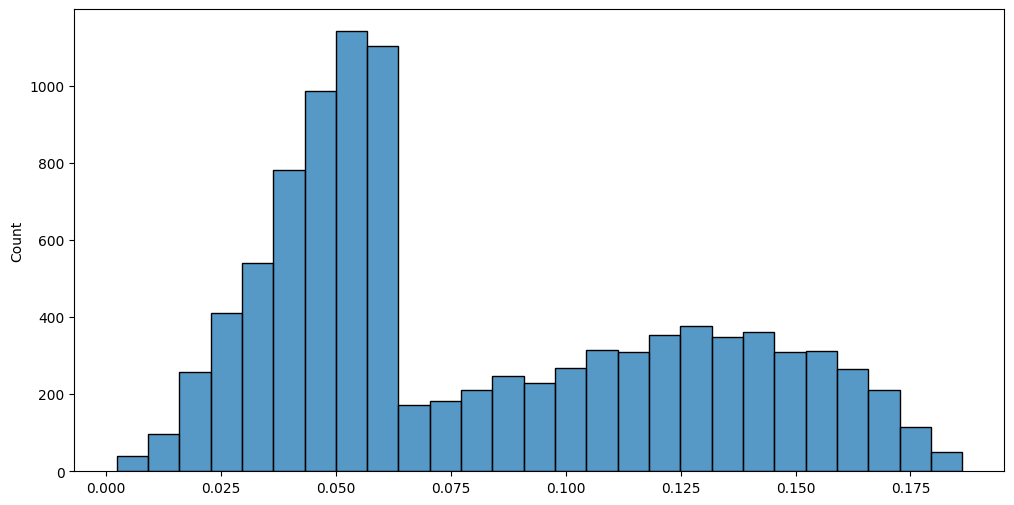

In [75]:
fix, ax = plt.subplots(figsize=(12,6))
sns.histplot(regrets)

Regret histograms - comparing to asymetric rewards

In [47]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets_asym = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor, sampling="asymetric")
    reward = deepcopy(tree).uniform_search()
    regrets_asym.append(tree.compute_regret(reward))

/tmp/ipykernel_143599/230745211.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets, color='blue', kde=True, label='Uniform rewards')
/tmp/ipykernel_143599/230745211.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_asym, color='red', kde=True, label='Asymetric rewards')


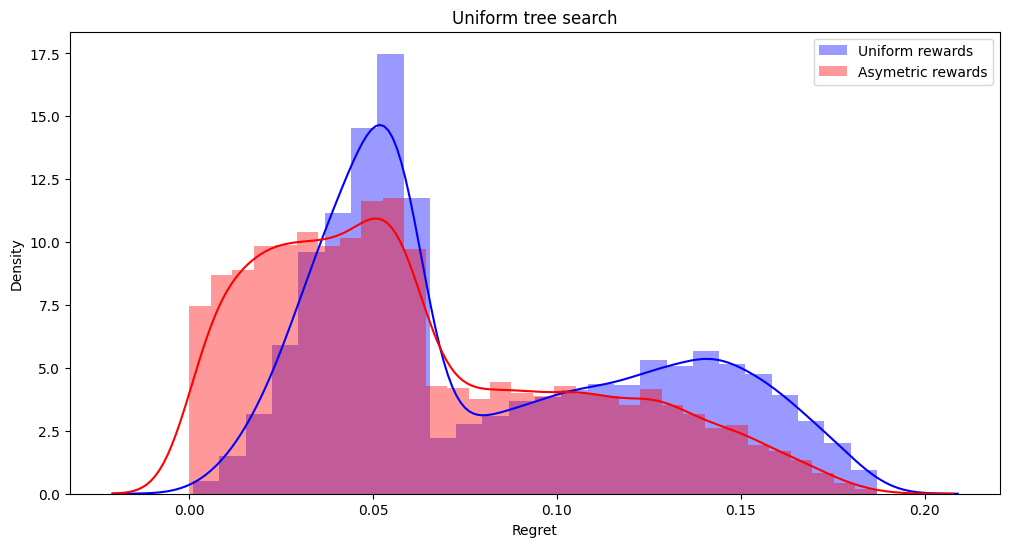

In [48]:
fix, ax = plt.subplots(figsize=(12,6))

# Plotting histograms with density function
sns.distplot(regrets, color='blue', kde=True, label='Uniform rewards')
sns.distplot(regrets_asym, color='red', kde=True, label='Asymetric rewards')

# Adding labels and legend
plt.title("Uniform tree search")
plt.xlabel('Regret')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


# Optimistic planning

Comparing to uniform search - uniform case

In [57]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets_uniform = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor)
    reward = deepcopy(tree).uniform_search()
    regrets_uniform.append(tree.compute_regret(reward))

In [58]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets_optimistic = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor)
    reward = deepcopy(tree).optimistic_search()
    regrets_optimistic.append(tree.compute_regret(reward))

/tmp/ipykernel_143599/459815244.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_uniform, color='blue', kde=True, label='Uniform')
/tmp/ipykernel_143599/459815244.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_optimistic, color='red', kde=True, label='Optimistic')


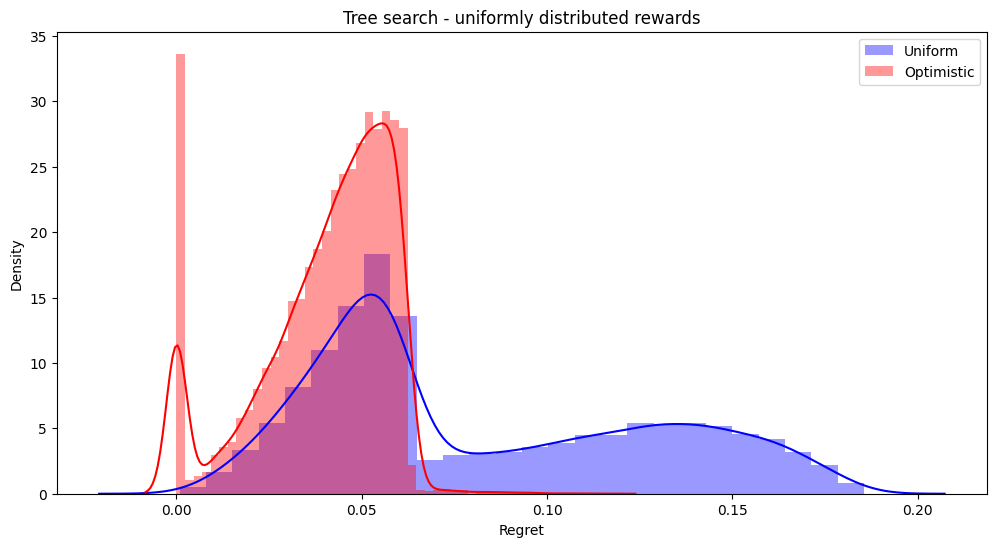

In [59]:
fix, ax = plt.subplots(figsize=(12,6))

# Plotting histograms with density function
sns.distplot(regrets_uniform, color='blue', kde=True, label='Uniform')
sns.distplot(regrets_optimistic, color='red', kde=True, label='Optimistic')

# Adding labels and legend
plt.title("Tree search - uniformly distributed rewards")
plt.xlabel('Regret')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


Asymetric rewards

In [60]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets_uniform = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor, sampling="asymetric")
    reward = deepcopy(tree).uniform_search()
    regrets_uniform.append(tree.compute_regret(reward))

In [76]:
n_samples = 10

depth = 18
branching_factor = 2
discount_factor = 0.9
n = 3000

regrets_uniform = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor, sampling="asymetric")
    reward = deepcopy(tree).uniform_search()
    regrets_uniform.append(tree.compute_regret(reward))

In [62]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets_optimistic = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor, sampling="asymetric")
    reward = deepcopy(tree).optimistic_search()
    regrets_optimistic.append(tree.compute_regret(reward))

In [77]:
n_samples = 10

depth = 18
branching_factor = 2
discount_factor = 0.5
n = 3000

regrets_optimistic = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor, sampling="asymetric")
    reward = deepcopy(tree).optimistic_search()
    regrets_optimistic.append(tree.compute_regret(reward))

/tmp/ipykernel_143599/122853821.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_uniform, color='blue', kde=True, label='Uniform')
/tmp/ipykernel_143599/122853821.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_optimistic, color='red', kde=True, label='Optimistic')


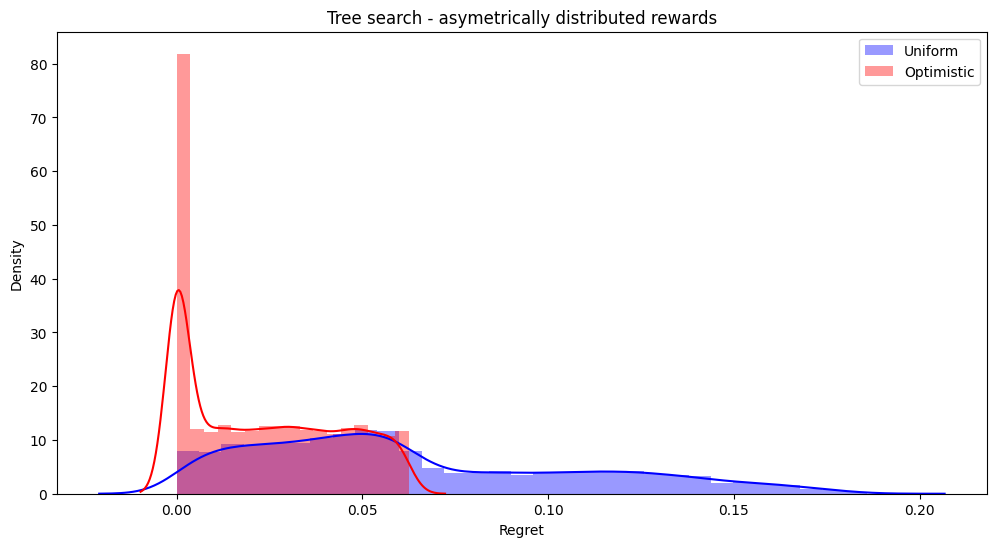

In [64]:
fix, ax = plt.subplots(figsize=(12,6))

# Plotting histograms with density function
sns.distplot(regrets_uniform, color='blue', kde=True, label='Uniform')
sns.distplot(regrets_optimistic, color='red', kde=True, label='Optimistic')

# Adding labels and legend
plt.title("Tree search - asymetrically distributed rewards")
plt.xlabel('Regret')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


/tmp/ipykernel_143599/1981930676.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_uniform, color='blue', kde=True, label='Uniform')
/tmp/ipykernel_143599/1981930676.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regrets_optimistic, color='red', kde=True, label='Optimistic')


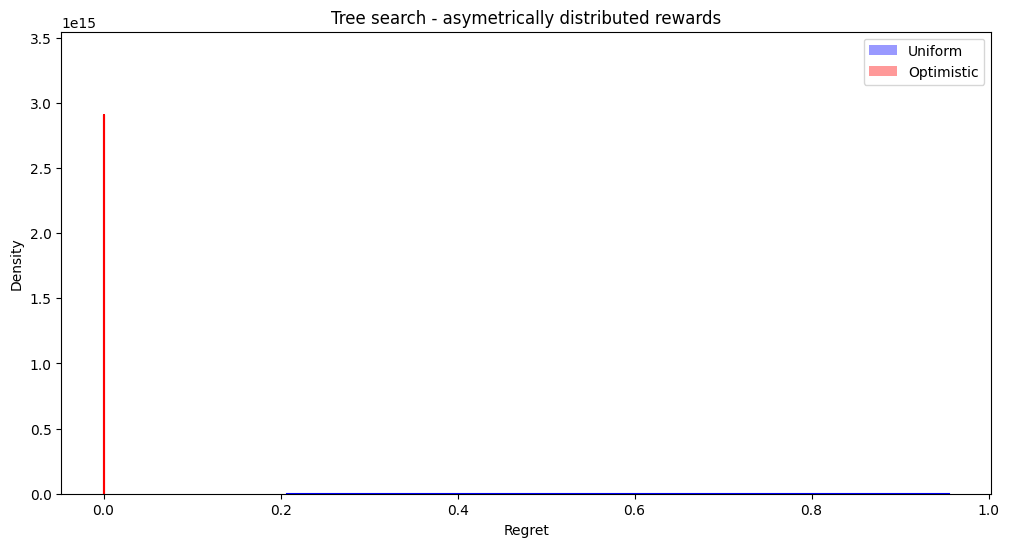

In [78]:
fix, ax = plt.subplots(figsize=(12,6))

# Plotting histograms with density function
sns.distplot(regrets_uniform, color='blue', kde=True, label='Uniform')
sns.distplot(regrets_optimistic, color='red', kde=True, label='Optimistic')

# Adding labels and legend
plt.title("Tree search - asymetrically distributed rewards")
plt.xlabel('Regret')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()